In [1]:
# Core Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install imbalanced-learn
!pip install wordcloud
!pip install tensorflow
from imblearn.over_sampling import SMOTE
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from collections import Counter
import re
import string
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import numpy as np

# ✅ Use TensorFlow's built-in Keras (recommended since TF 2.x)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional, Conv1D, GlobalMaxPooling1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


# read data set

In [2]:
df=pd.read_csv("Combined Data.csv")
df

Unnamed: 0                                          statement   status
0               0                                         oh my gosh  Anxiety
1               1  trouble sleeping, confused mind, restless hear...  Anxiety
2               2  All wrong, back off dear, forward doubt. Stay ...  Anxiety
3               3  I've shifted my focus to something else but I'...  Anxiety
4               4  I'm restless and restless, it's been a month n...  Anxiety
...           ...                                                ...      ...
53038       53038  Nobody takes me seriously I’ve (24M) dealt wit...  Anxiety
53039       53039  selfishness  "I don't feel very good, it's lik...  Anxiety
53040       53040  Is there any way to sleep better? I can't slee...  Anxiety
53041       53041  Public speaking tips? Hi, all. I have to give ...  Anxiety
53042       53042  I have really bad door anxiety! It's not about...  Anxiety

[53043 rows x 3 columns]

In [3]:
df.info()                                                  #data preprocessing

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53043 entries, 0 to 53042
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  53043 non-null  int64 
 1   statement   52681 non-null  object
 2   status      53043 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


In [4]:
df.drop(columns=['Unnamed: 0'], inplace=True, errors='ignore')    #unnecessary column remove
df


statement   status
0                                             oh my gosh  Anxiety
1      trouble sleeping, confused mind, restless hear...  Anxiety
2      All wrong, back off dear, forward doubt. Stay ...  Anxiety
3      I've shifted my focus to something else but I'...  Anxiety
4      I'm restless and restless, it's been a month n...  Anxiety
...                                                  ...      ...
53038  Nobody takes me seriously I’ve (24M) dealt wit...  Anxiety
53039  selfishness  "I don't feel very good, it's lik...  Anxiety
53040  Is there any way to sleep better? I can't slee...  Anxiety
53041  Public speaking tips? Hi, all. I have to give ...  Anxiety
53042  I have really bad door anxiety! It's not about...  Anxiety

[53043 rows x 2 columns]

In [5]:
df.isnull().sum()

statement    362
status         0
dtype: int64

In [6]:
df.dropna(axis=0,inplace=True)

In [7]:
#checking the missing values
df['statement'].isnull().sum()

np.int64(0)

In [8]:
df['statement'] = df['statement'].fillna("")               # Missing text ni empty string ga fill cheyy

In [9]:
print("Total missing values:", df.isnull().sum().sum())

Total missing values: 0


In [10]:
df.isnull().sum()

statement    0
status       0
dtype: int64

In [11]:
import re
import nltk
nltk.download('stopwords')                                                        #data prprocessing
nltk.download('wordnet')
nltk.download('punkt_tab')

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [12]:
def text_preprocessing(text):
    # Make all words lowercase
    text=text.lower()

    # Remove  punction,number & spical char
    text=re.sub('[^a-zA-z]',' ',text)

    # Single char removel
    text=re.sub(r'\s+[a-zA-z]\s+',' ',text)

    # Remove multi spaces
    text=re.sub(r'\s+',' ',text)

    # Make a sentence to toknize
    tokens=word_tokenize(text)

    # Remove Stopwords
    final_token=[i for i in tokens if i not in stop_words]

    # Apply lemma
    final_words=[]
    lemma=WordNetLemmatizer()
    for i in final_token:
        if len(i)>2:
            word=lemma.lemmatize(i)
            final_words.append(word)
    return ' '.join(final_words)

In [13]:
stop_words=stopwords.words('english')

In [14]:
df['Clean_Text']=df['statement'].apply(lambda x: text_preprocessing(x))
print('Text Preprocessing is done')

Text Preprocessing is done


# eda

In [15]:
df['status'].value_counts()

status
Normal                  16343
Depression              15404
Suicidal                10652
Anxiety                  3841
Bipolar                  2777
Stress                   2587
Personality disorder     1077
Name: count, dtype: int64

In [16]:
df['text_length'] = df['Clean_Text'].apply(lambda x: len(x.split()))

df['text_length'].describe()

count    52681.000000
mean        49.431522
std         70.680749
min          0.000000
25%          8.000000
50%         27.000000
75%         64.000000
max       2520.000000
Name: text_length, dtype: float64

In [17]:
df.groupby('status')['text_length'].mean()

status
Anxiety                 66.526686
Bipolar                 79.972632
Depression              72.021163
Normal                   8.277366
Personality disorder    80.253482
Stress                  52.467337
Suicidal                61.925648
Name: text_length, dtype: float64

In [18]:
from collections import Counter

all_words = " ".join(df['Clean_Text']).split()
Counter(all_words).most_common(40)

[('like', 38791),
 ('feel', 35709),
 ('want', 28779),
 ('know', 24532),
 ('life', 23703),
 ('get', 23289),
 ('time', 21668),
 ('even', 18823),
 ('people', 17065),
 ('would', 16871),
 ('day', 16826),
 ('year', 16813),
 ('thing', 16445),
 ('really', 16398),
 ('one', 15740),
 ('going', 13893),
 ('think', 13731),
 ('friend', 13450),
 ('make', 12625),
 ('much', 11935),
 ('never', 11800),
 ('help', 11569),
 ('feeling', 10047),
 ('could', 9866),
 ('work', 9855),
 ('thought', 9797),
 ('anymore', 9682),
 ('anxiety', 9626),
 ('back', 9490),
 ('anything', 9095),
 ('way', 9071),
 ('take', 9056),
 ('still', 8958),
 ('depression', 8934),
 ('something', 8756),
 ('good', 8513),
 ('got', 8499),
 ('always', 8425),
 ('anyone', 8374),
 ('everything', 8372)]

In [19]:
# Get most common words
all_words=[]

for line in df['statement']:
    words=line.split()
    for word in words:
        if len(word)>2:
            all_words.append(word.lower())

Counter(all_words).most_common(40)

[('and', 174838),
 ('the', 126412),
 ('not', 74161),
 ('have', 69143),
 ('that', 64432),
 ('but', 55707),
 ('for', 53663),
 ('just', 48452),
 ('this', 41661),
 ('with', 40552),
 ('was', 37232),
 ('like', 37128),
 ('feel', 31010),
 ('you', 28826),
 ('want', 26851),
 ('about', 24678),
 ('all', 23657),
 ('because', 22234),
 ('know', 22052),
 ('what', 22042),
 ('been', 21832),
 ('get', 21507),
 ('when', 19502),
 ('they', 19227),
 ('can', 18706),
 ('even', 18505),
 ('are', 18462),
 ('will', 18388),
 ('how', 18167),
 ('out', 18154),
 ('had', 17996),
 ('would', 16686),
 ('myself', 16273),
 ('she', 16063),
 ('really', 15916),
 ('life', 15790),
 ('from', 15199),
 ('cannot', 14968),
 ('people', 14523),
 ('time', 13741)]

In [20]:
target=df['status'].unique()                      #data visualization

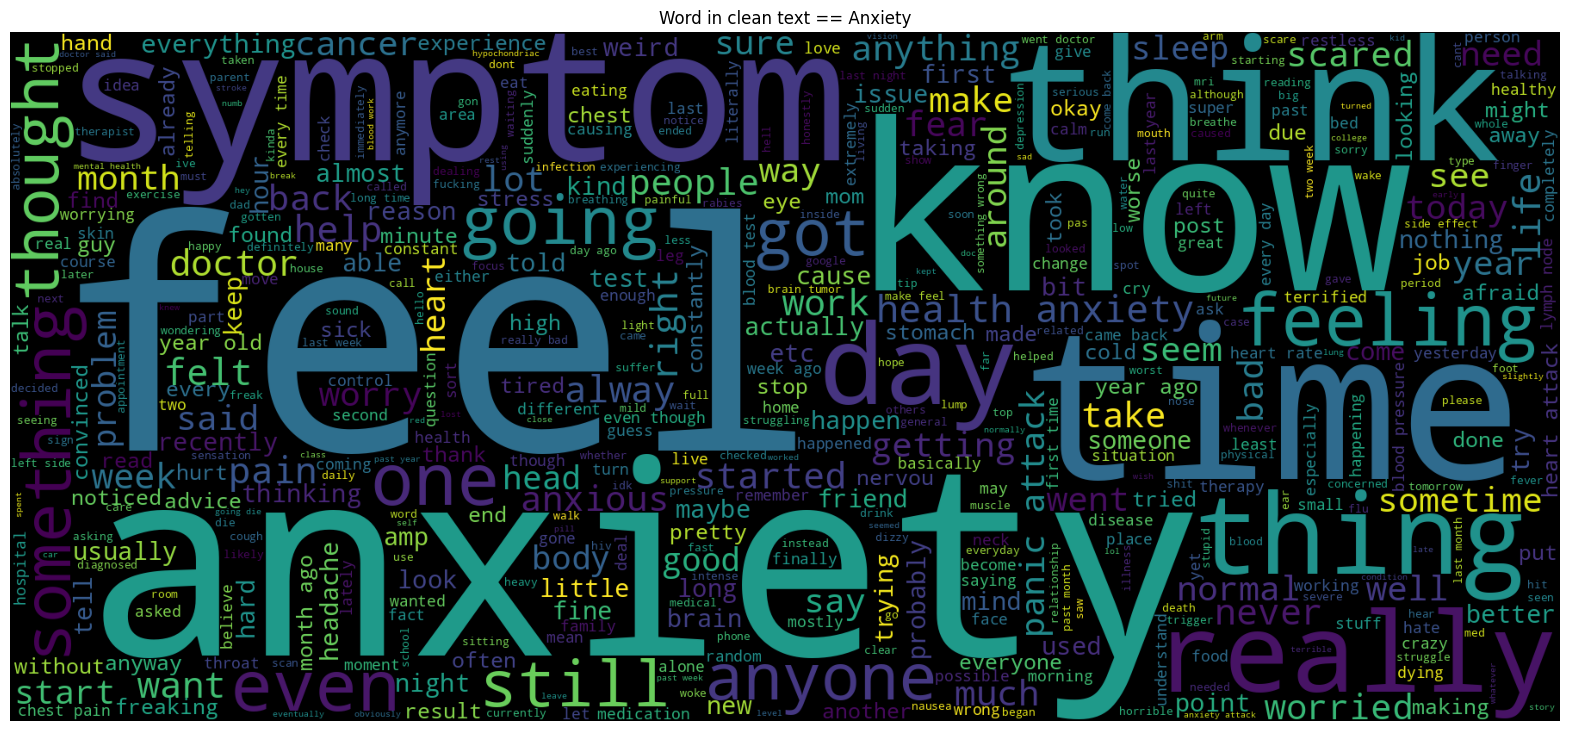

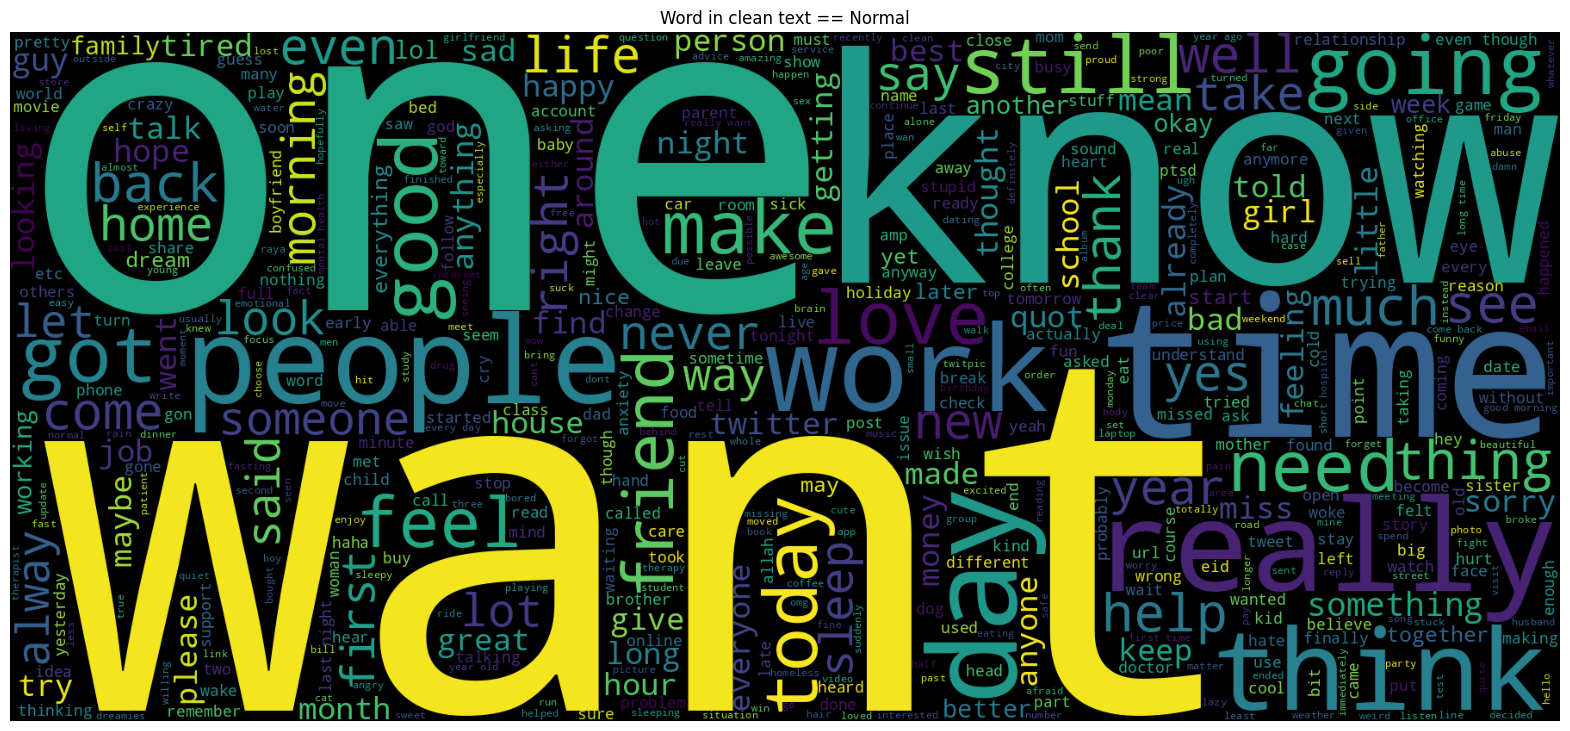

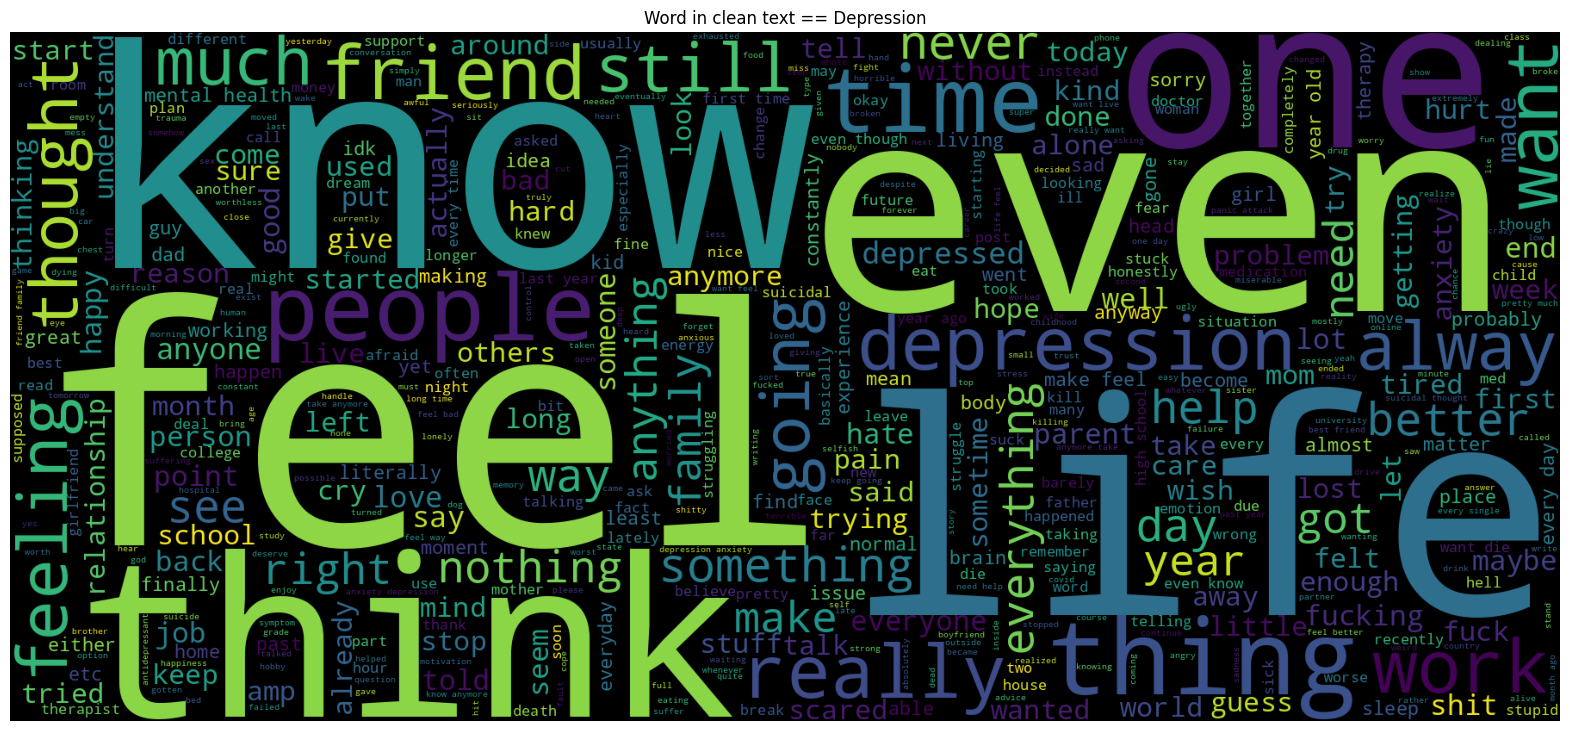

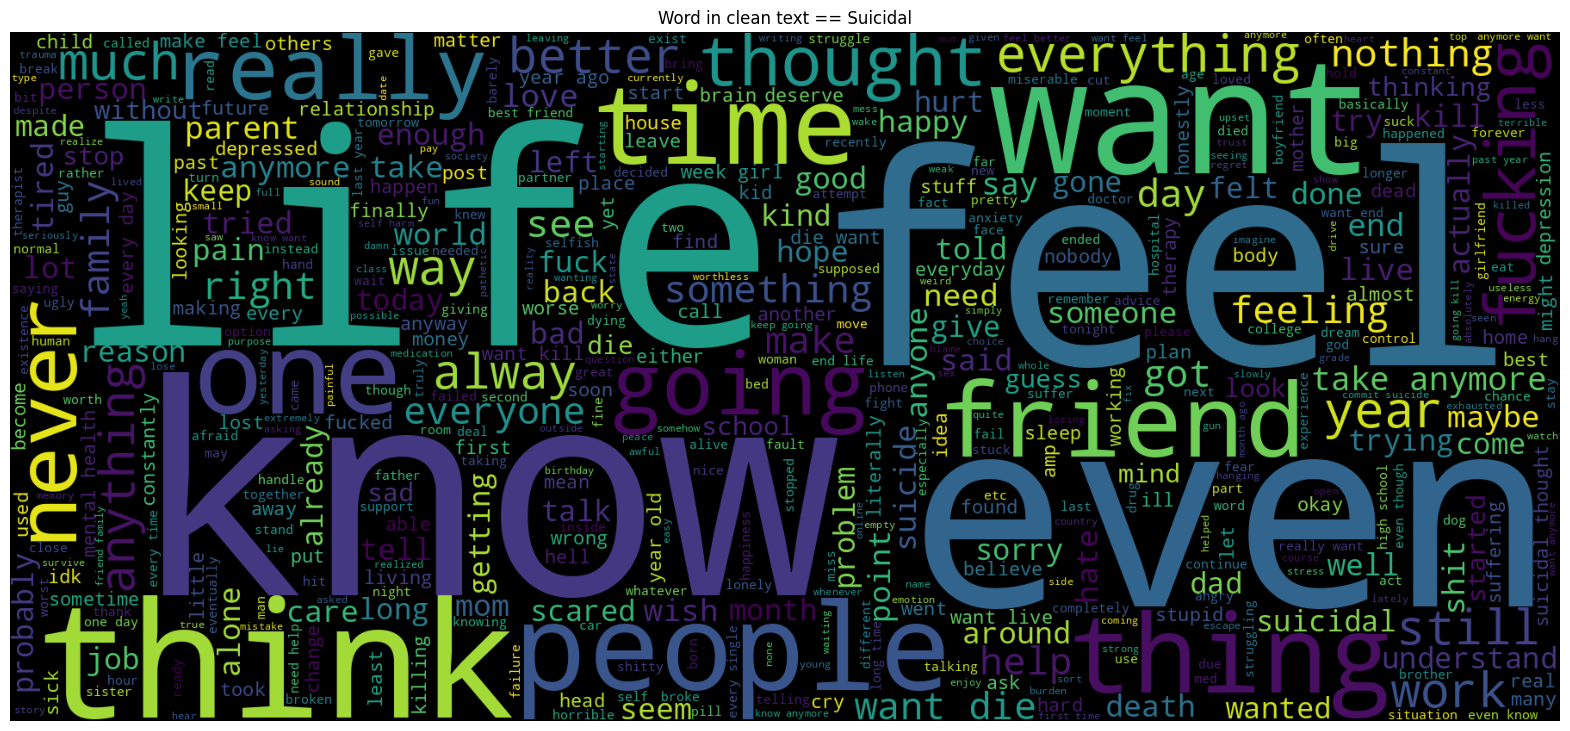

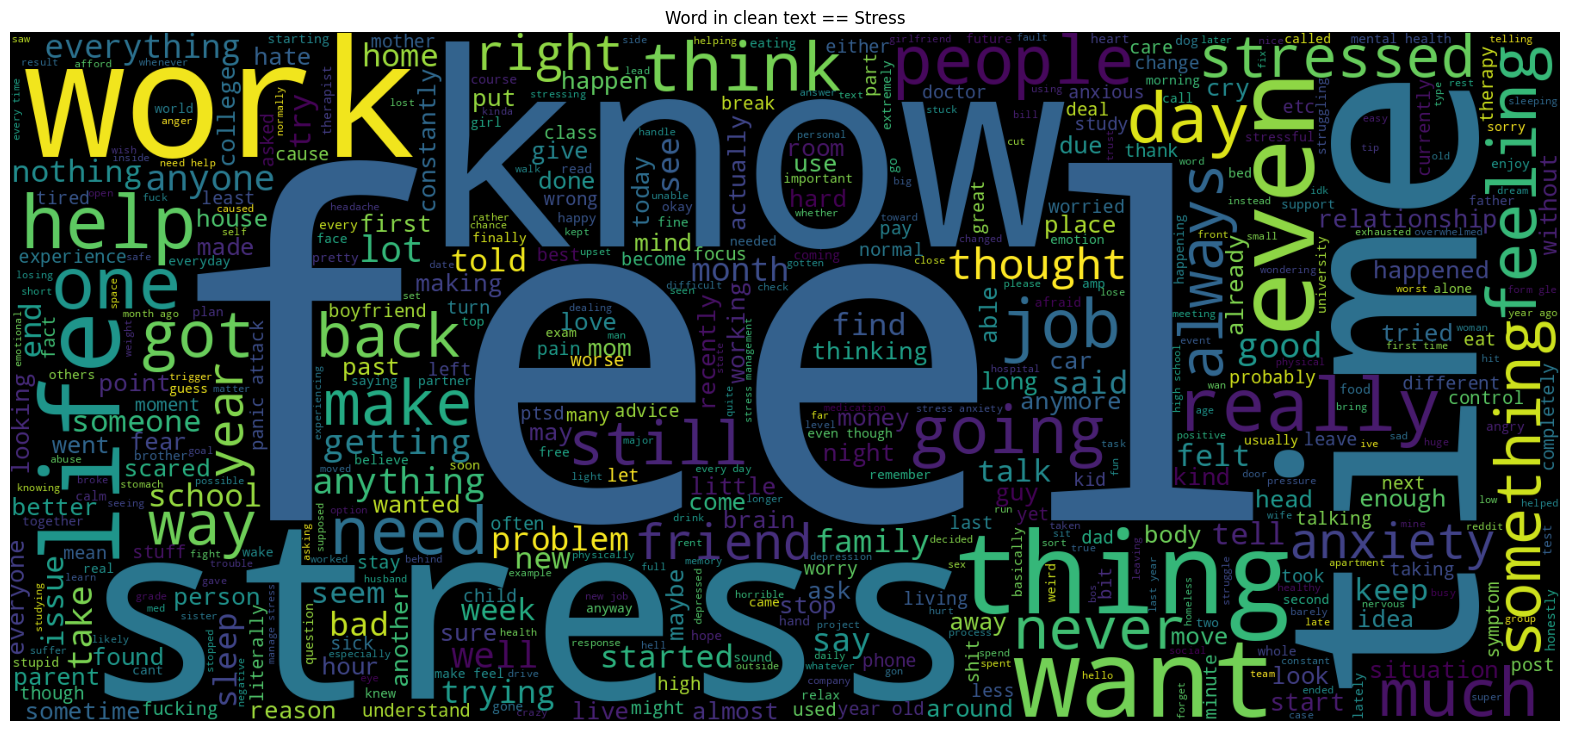

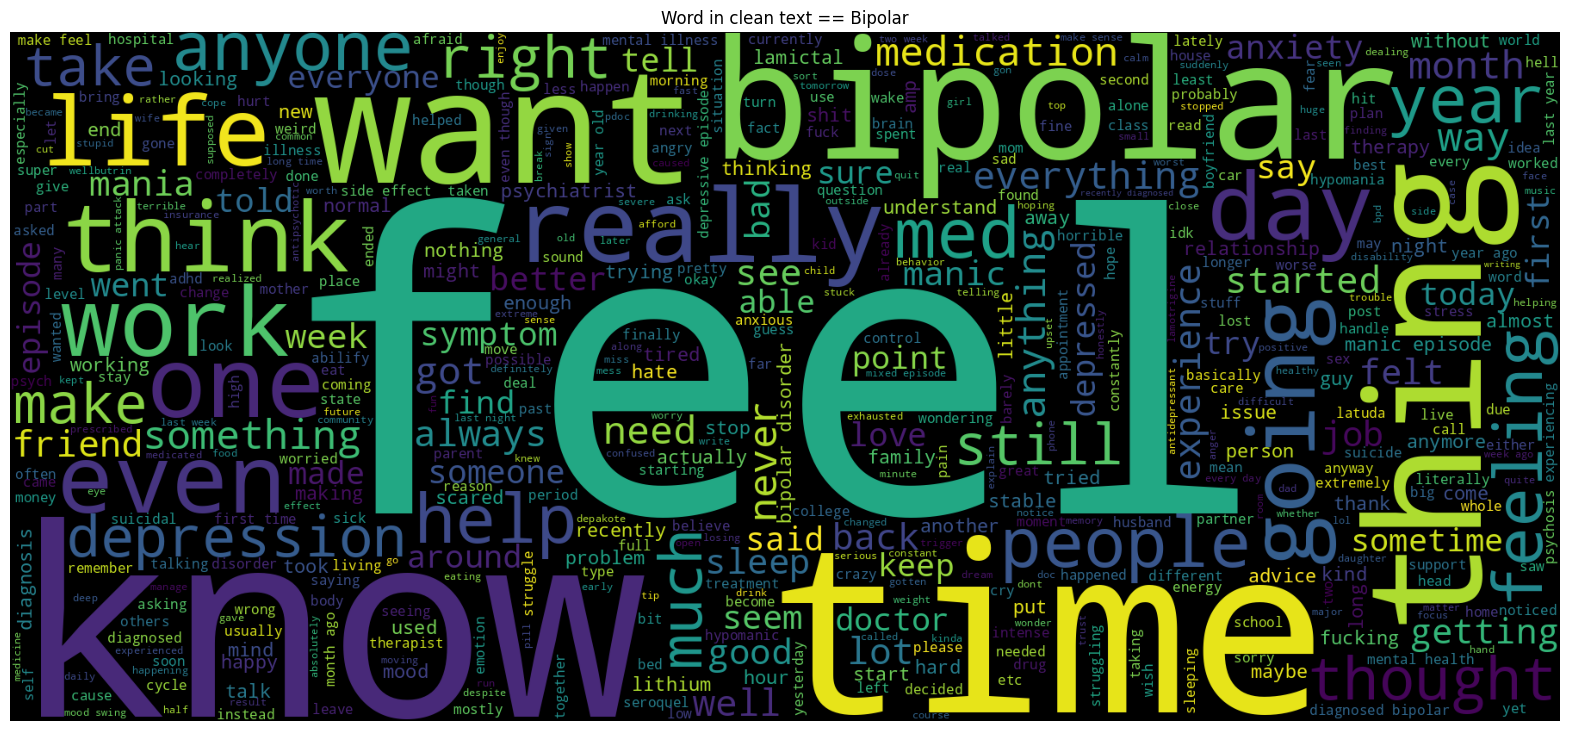

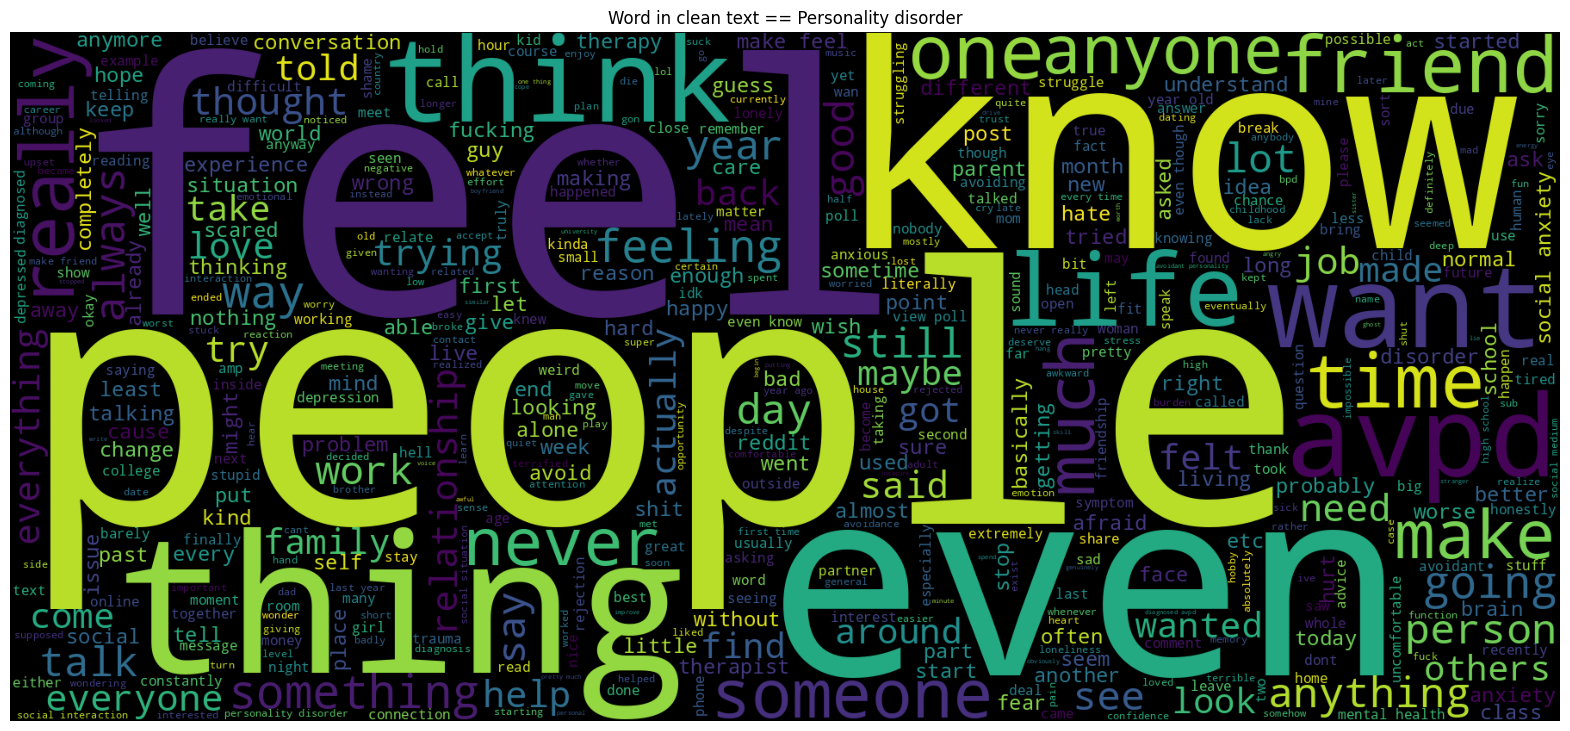

In [21]:
for i in target:
    plt.figure(figsize=(20,15))
    word_cloud=WordCloud(width=1800,height=800,max_words=500).generate(' '.join(df[df.status == i].Clean_Text))
    plt.imshow(word_cloud)
    plt.title(f'Word in clean text == {i}')
    plt.axis('off')
    plt.show()

In [22]:
x=df['Clean_Text']
y=df['status']

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

# text preprocessing

In [24]:
# Convert word to number
tokenizer=Tokenizer(num_words=10000)

# Creat a mapping of words to number
tokenizer.fit_on_texts(x_train)

# Transforming text into sequences
x_train_seq=tokenizer.texts_to_sequences(x_train)
x_test_seq=tokenizer.texts_to_sequences(x_test)

In [25]:
!pip install gensim
import pandas as pd
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import nltk

nltk.download('punkt')

# Load dataset
df = pd.read_csv("Combined Data.csv")

# Text column
texts = df['statement'].astype(str)

# Tokenization
sentences = [word_tokenize(text.lower()) for text in texts]

# Train Word2Vec model
word2vec_model = Word2Vec(
    sentences=sentences,
    vector_size=100,
    window=5,
    min_count=2,
    workers=4
)

# Example: get vector for a word
vector = word2vec_model.wv['stress']
print(vector)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 83.9 MB/s eta 0:00:00


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


[-1.0492485  -1.4853159   2.3226974   3.1311297  -1.426599   -0.5371739
 -0.09876352 -3.343779   -0.5582302   0.46600527 -0.64090663 -0.56429267
  2.9841106  -0.35674527 -0.1654373   0.04384328  0.25108323 -0.13988163
  3.7107341   0.11825405 -0.8374321  -0.22982642  0.9011704   0.28721535
  0.06339969 -0.20745078 -0.8677982   1.8175547   2.9101353  -0.6115672
 -0.19152047  0.9736655   0.3726777  -0.9305009   1.5102174   0.9286973
 -0.4658174  -4.2864523  -1.9379319   1.7678207   1.7063683  -0.64524233
  0.36956632 -0.49890766 -0.7526032  -2.5296302  -0.44445634 -2.795601
  0.44302806 -0.04674719  2.1074388  -0.39625326  0.91204935  1.2649767
 -0.12382458 -0.67062867 -0.87608486 -0.37314805  0.3065586  -1.2176788
 -0.05349836  0.19984865 -0.12256174 -0.51281583 -3.0112376   0.73351717
  1.2408193  -0.04721093 -1.1722015   1.2057595   1.363404    0.0933498
  0.4293116   0.17930491  1.295475    2.26567    -1.0578624   1.1098366
 -0.3170887   0.94119304 -2.265794   -1.1111835   2.2783403 

In [26]:
# Sentence → Vector (Word2Vec average)
import numpy as np
from nltk.tokenize import word_tokenize

def sentence_vector(sentence, model):
    words = word_tokenize(sentence.lower())
    vectors = [model.wv[word] for word in words if word in model.wv]

    if len(vectors) == 0:
        return np.zeros(model.vector_size)

    return np.mean(vectors, axis=0)

In [27]:
X = np.array([                                                              #Feature matrix (X) & labels (y)
    sentence_vector(text, word2vec_model)
    for text in df['statement'].astype(str)
])

y = df['status']

# train-test spit

In [28]:
# Padding---> Ensuring all sequences are of the same lenght
max_len=100

x_train_pad=pad_sequences(x_train_seq,maxlen=max_len)
x_test_pad=pad_sequences(x_test_seq,maxlen=max_len)

In [29]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
y_train_enc=label.fit_transform(y_train)
y_test_enc=label.transform(y_test)

# balanced

In [30]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train_enc),
    y=y_train_enc
)

class_weight_dict = dict(enumerate(class_weights))
print(class_weight_dict)


{0: np.float64(1.9509304694009815), 1: np.float64(2.675809523809524), 2: np.float64(0.4860002767655335), 3: np.float64(0.46187736314318595), 4: np.float64(7.16734693877551), 5: np.float64(2.9354321933551577), 6: np.float64(0.7088028524336506)}


# build a model

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, BatchNormalization, LSTM, Dropout, Dense

max_len = 100  # Example — use the same as your preprocessing

model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=128, input_length=max_len))
model.add(BatchNormalization())
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64))
model.add(Dropout(0.2))
model.add(Dense(7, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.build(input_shape=(None, max_len))
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 100, 128)       │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 100, 128)       │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 100, 128)       │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,461,959 (5.58 MB)

 Trainable params: 1,461,703 (5.58 MB)

 Non-trainable params: 256 (1.00 KB)

In [32]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical

In [33]:
df = pd.read_csv("Combined Data.csv")               #load the data set
df = df[['statement', 'status']]
df.dropna(inplace=True)

In [34]:
#encode the labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['status'])
y = to_categorical(y)

In [35]:
#text tokenizations
max_words = 10000   # vocabulary size
max_len = 100       # sentence length

tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(df['statement'])

sequences = tokenizer.texts_to_sequences(df['statement'])
X = pad_sequences(sequences, maxlen=max_len, padding='post')

In [36]:
#train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [37]:
#build LSTM model
model = Sequential()

model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))
model.add(LSTM(128, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dense(y.shape[1], activation='softmax'))

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [38]:
#train the model
history = model.fit(
    X_train, y_train,
    epochs=8,
    batch_size=64,
    validation_data=(X_test, y_test)
)

Epoch 1/8
659/659 ━━━━━━━━━━━━━━━━━━━━ 189s 281ms/step - accuracy: 0.4767 - loss: 1.4348 - val_accuracy: 0.5432 - val_loss: 1.2017
Epoch 2/8
659/659 ━━━━━━━━━━━━━━━━━━━━ 171s 260ms/step - accuracy: 0.5299 - loss: 1.2393 - val_accuracy: 0.5930 - val_loss: 0.9441
Epoch 3/8
659/659 ━━━━━━━━━━━━━━━━━━━━ 178s 270ms/step - accuracy: 0.6265 - loss: 0.8465 - val_accuracy: 0.6694 - val_loss: 0.7753
Epoch 4/8
659/659 ━━━━━━━━━━━━━━━━━━━━ 168s 255ms/step - accuracy: 0.6981 - loss: 0.7019 - val_accuracy: 0.7168 - val_loss: 0.7078
Epoch 5/8
659/659 ━━━━━━━━━━━━━━━━━━━━ 203s 257ms/step - accuracy: 0.7686 - loss: 0.5826 - val_accuracy: 0.7348 - val_loss: 0.6566
Epoch 6/8
659/659 ━━━━━━━━━━━━━━━━━━━━ 202s 258ms/step - accuracy: 0.8130 - loss: 0.4798 - val_accuracy: 0.7428 - val_loss: 0.6551
Epoch 7/8
659/659 ━━━━━━━━━━━━━━━━━━━━ 200s 255ms/step - accuracy: 0.8518 - loss: 0.4002 - val_accuracy: 0.7624 - val_loss: 0.6563
Epoch 8/8
659/659 ━━━━━━━━━━━━━━━━━━━━ 170s 257ms/step - accuracy: 0.8764 - loss: 0

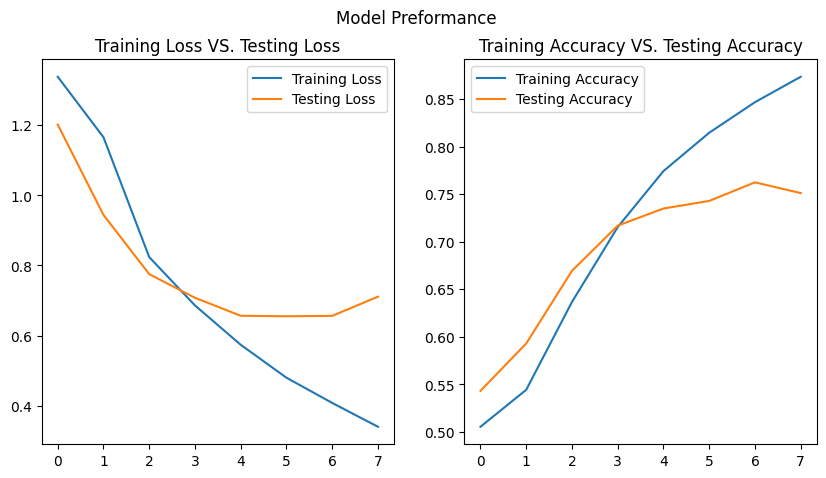

In [39]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
fig.suptitle('Model Preformance')
ax[0].plot(history.history['loss'],label='Training Loss')
ax[0].plot(history.history['val_loss'],label='Testing Loss')
ax[0].set_title('Training Loss VS. Testing Loss')
ax[0].legend()

ax[1].plot(history.history['accuracy'],label='Training Accuracy')
ax[1].plot(history.history['val_accuracy'],label='Testing Accuracy')
ax[1].set_title('Training Accuracy VS. Testing Accuracy')
ax[1].legend()

In [40]:
y_pred=model.predict(x_test_pad)                    #Total training samples = 21,120
                                                        #Batch size = 64
y_pred_class=np.argmax(y_pred,axis=1)
y_pred_label=label.inverse_transform(y_pred_class)

330/330 ━━━━━━━━━━━━━━━━━━━━ 17s 52ms/step


In [41]:
model.save("model.h5")

In [42]:
import pickle

with open("tokenizer.pkl", "wb") as f:
    pickle.dump(tokenizer, f)

In [43]:
with open("label_encoder.pkl", "wb") as f:
    pickle.dump(label, f)

In [49]:
!pip install streamlit

In [50]:
%%writefile app.py
import streamlit as st
import pickle
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load saved files
model = load_model("model.h5")

with open("tokenizer.pkl", "rb") as f:
    tokenizer = pickle.load(f)

with open("label_encoder.pkl", "rb") as f:
    le = pickle.load(f)

# Parameters (same as training)
max_len = 100

# UI
st.title("NLP Text Classification using LSTM")
st.write("Enter text to predict the class")

user_input = st.text_area("Enter your text here")

if st.button("Predict"):
    if user_input.strip() == "":
        st.warning("Please enter some text")
    else:
        seq = tokenizer.texts_to_sequences([user_input])
        pad = pad_sequences(seq, maxlen=max_len, padding='post')
        pred = model.predict(pad)
        label = le.inverse_transform([np.argmax(pred)])
        st.success(f"Prediction: {label[0]}")

Writing app.py


In [57]:
%%writefile requirements.txt
tensorflow==2.15.0
keras==2.15.0
numpy
pandas
scikit-learn
matplotlib


Overwriting requirements.txt
